# Deep Neural Network for Multiclass Classfication
##### 1. Load data and preprocessing
##### 2. Use NN
##### 3. Train with full data set

##### Dataset: 
    fashion mnist

##### Deep Neural Network:
    Handwritten neural network with numpy, math and matplotlib libraries only
    Functionalities:         
            weight initialization: "random", "he", "xavier" or "heuristic"
            activation function: "sigmoid", "relu" or "leaky_relu"
            gradient descent: "batch", "mini batch" or "stochastic"
            optimization: "gradient descent", "momentum", "RMSProp" or "adam"
            regulation: "L2", "dropout" or "batch normalization"
            early stoping: stop training when cost is low


## 1. Load data and preprocessing

### 1.1 Load data

In [11]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')

### 1.2 Split data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=666)

### 1.3 Standardlize data

In [13]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)

G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_train_standard = standardScaler.transform(X_train).T
X_val_standard = standardScaler.transform(X_val).T
X_test_standard = standardScaler.transform(X_test).T


G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
y_train = y_train.T
y_val = y_val.T
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit([0,1,2,3,4,5,6,7,8,9])
y_train=lb.transform(y_train).T
# y_val=lb.transform(y_val).T

In [16]:
X_train_standard = X_train_standard[:,0:5000]
y_train = y_train[:,0:5000]

print('X_train_standard.shape:', X_train_standard.shape)
print('y_train.shape:', y_train.shape)
print('X_val_standard.shape:', X_val_standard.shape)
print('y_val.shape:', y_val.shape)

X_train_standard.shape: (784, 5000)
y_train.shape: (10, 5000)
X_val_standard.shape: (784, 12000)
y_val.shape: (12000,)


### 1.4 PCA 

In [43]:
from scipy import linalg
U,s,VT = linalg.svd(X_train_standard)
X_train_standard_pca=U[:,:100].T.dot(X_train_standard)
X_val_standard_pca= U[:,:100].T.dot(X_val_standard)
X_test_standard_pca = U[:,:100].T.dot(X_test_standard)


In [18]:
# both are ok
# from scipy import linalg
# U,s,VT = linalg.svd(X_train_standard.T)
# X_train_standard_pca=X_train_standard.T.dot(VT.T[:,:100]).T
# X_val_standard_pca=X_val_standard.T.dot(VT.T[:,:100]).T
# X_test_standard_pca = X_test_standard.T.dot(VT.T[:,:100]).T

## 2. Use NN


Mini Batch Gradient Descent...
Total cost after iteration 0: 12.273330
Total cost after iteration 5: 8.960242
Total cost after iteration 10: 7.417227
Total cost after iteration 15: 6.398600
Total cost after iteration 20: 5.652895
Total cost after iteration 25: 5.056559
Total cost after iteration 30: 4.586583
Total cost after iteration 35: 4.191464
Total cost after iteration 40: 3.858103
Total cost after iteration 45: 3.581915
Total cost after iteration 50: 3.336188
Total cost after iteration 55: 3.115692
Total cost after iteration 60: 2.936546
Total cost after iteration 65: 2.784578
Total cost after iteration 70: 2.638263
Total cost after iteration 75: 2.503582
Total cost after iteration 80: 2.398381
Total cost after iteration 85: 2.282845
Total cost after iteration 90: 2.182244
Total cost after iteration 95: 2.110333
Total cost after iteration 100: 2.033852
Total cost after iteration 105: 1.945765
Total cost after iteration 110: 1.876367
Total cost after iteration 115: 1.829866
Total 

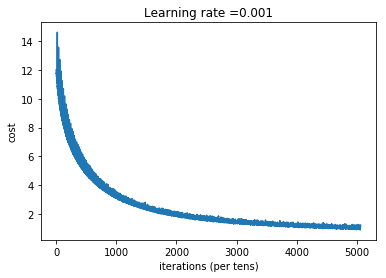

In [49]:
%run NN_V1.py
NN_classifier = NN(L_dim = [X_train_standard_pca.shape[0], 100,10],
                   initialization="he",activation="relu",
                      learning_rate = 0.001,num_iterations = 1000,early_stop=True, cost_stop=1.1,
                      batch=False, mini_batch=True,mini_batch_size=256,
                      optimizer="adam", beta = 0.9, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-6,
                      lambd=1,keep_prob = 0.7,
                      batchnormalization = True,
                      print_cost = True, print_cost_every_n_iterations=50)
NN_classifier.fit(X_train_standard_pca, y_train)

In [50]:
pred_train = NN_classifier.predict(X_val_standard_pca, y_val)

Accuracy: 0.8545


In [51]:
pred_train = NN_classifier.predict(X_test_standard_pca, y_test)

Accuracy: 0.8422000000000003


## 3. Train with full data set

In [1]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train)

X_train_standard = standardScaler.transform(X_train).T
X_test_standard = standardScaler.transform(X_test).T

y_train = y_train.T
y_test = y_test.T
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit([0,1,2,3,4,5,6,7,8,9])
y_train=lb.transform(y_train).T

G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
G:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
%%time
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(X_train_standard.T)
X_train_standard_pca = pca.transform(X_train_standard.T).T

# X_val_PCA = pca.transform(X_val) 

X_test_standard_pca = pca.transform(X_test_standard.T).T
# from scipy import linalg
# U,s,VT = linalg.svd(X_train_standard)
# X_train_standard_pca=U[:,:100].T.dot(X_train_standard)
# X_test_standard_pca = U[:,:100].T.dot(X_test_standard)

Wall time: 4.11 s


In [6]:
X_test_standard_pca.shape

(137, 10000)

Mini Batch Gradient Descent...
Total cost after iteration 0: 10.766085
Total cost after iteration 5: 7.775381
Total cost after iteration 10: 6.417362
Total cost after iteration 15: 5.487882
Total cost after iteration 20: 4.793293
Total cost after iteration 25: 4.250079
Total cost after iteration 30: 3.811082
Total cost after iteration 35: 3.440228
Total cost after iteration 40: 3.127758
Total cost after iteration 45: 2.857755
Total cost after iteration 50: 2.620305
Total cost after iteration 55: 2.416975
Total cost after iteration 60: 2.233904
Total cost after iteration 65: 2.072013
Total cost after iteration 70: 1.931303
Total cost after iteration 75: 1.805336
Total cost after iteration 80: 1.698781
Total cost after iteration 85: 1.604930
Total cost after iteration 90: 1.516152
Total cost after iteration 95: 1.438370
Total cost after iteration 100: 1.374415
Total cost after iteration 105: 1.310270
Total cost after iteration 110: 1.261043
Total cost after iteration 115: 1.214014
Total 

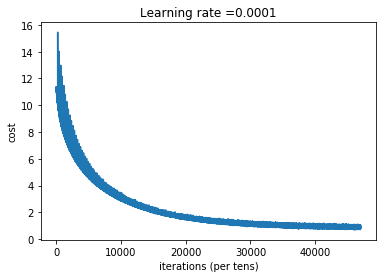

In [23]:
%run NN_V1.py
NN_classifier = NN(L_dim = [X_train_standard_pca.shape[0], 100,10],
                   initialization="he",activation="relu",
                      learning_rate = 0.0001,num_iterations = 200,early_stop=True, cost_stop=0.8,
                      batch=False, mini_batch=True,mini_batch_size=256,
                      optimizer="adam", beta = 0.9, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-6,
                      lambd=0.8,keep_prob = 0.7,
                      batchnormalization = True,
                      print_cost = True, print_cost_every_n_iterations=20)
NN_classifier.fit(X_train_standard_pca, y_train)

In [24]:
pred_train = NN_classifier.predict(X_test_standard_pca, y_test)

Accuracy: 0.8697000000000004


Mini Batch Gradient Descent...
Total cost after iteration 0: 8.866169
Total cost after iteration 5: 5.888320
Total cost after iteration 10: 4.606752
Total cost after iteration 15: 3.752474
Total cost after iteration 20: 3.127845
Total cost after iteration 25: 2.656395
Total cost after iteration 30: 2.283815
Total cost after iteration 35: 1.996886
Total cost after iteration 40: 1.771306
Total cost after iteration 45: 1.590528
Total cost after iteration 50: 1.453817
Total cost after iteration 55: 1.339901
Total cost after iteration 60: 1.251343
Total cost after iteration 65: 1.185261
Total cost after iteration 70: 1.131360
Total cost after iteration 75: 1.087421
Total cost after iteration 80: 1.051891
Total cost after iteration 85: 1.031698
Total cost after iteration 90: 1.006638


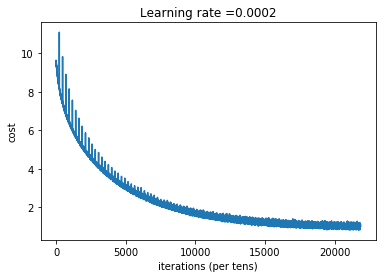

In [20]:
%run NN_V1.py
NN_classifier = NN(L_dim = [X_train_standard_pca.shape[0], 100,10],
                   initialization="he",activation="leaky_relu",
                      learning_rate = 0.0001,num_iterations = 300,early_stop=True, cost_stop=0.8,
                      batch=False, mini_batch=True,mini_batch_size=256,
                      optimizer="adam", beta = 0.9, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8,
                      lambd=0.5,keep_prob = 0.7,
                      batchnormalization = True,
                      print_cost = True, print_cost_every_n_iterations=10)
NN_classifier.fit(X_train_standard_pca, y_train)

In [21]:
pred_train = NN_classifier.predict(X_test_standard_pca, y_test)

Accuracy: 0.8607000000000002
